In [1]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('../../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/params_testing/')
from model_files.nerm_pvals import model 
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
from scipy.optimize import curve_fit
import seaborn as sns

In [ ]:
# m1 = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
# m2 = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
m3 = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
# m4 = np.load('../../params_testing/necro_pars10k_mode4_5720_modcylda20.npy')

In [2]:
m3 = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m1p2kd = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m1p2oe = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m1p3kd = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m1p3oe = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m1p4kd = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m1p4oe = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m1p5kd = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m1p5oe = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m1p6kd = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m1p6oe = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m1p12kd = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m1p12oe = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m1p13kd = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
m1p13oe = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')

In [44]:
print(len(m3))

2042


In [3]:
m1p2kd[:][:,15] = m1p2kd[:][:,15]/10
m1p2oe[:][:,15] = m1p2oe[:][:,15]*10

m1p3kd[:][:,16] = m1p3kd[:][:,16]/10
m1p3oe[:][:,16] = m1p3oe[:][:,16]*10

m1p4kd[:][:,17] = m1p4kd[:][:,17]/10
m1p4oe[:][:,17] = m1p4oe[:][:,17]*10

m1p5kd[:][:,18] = m1p5kd[:][:,18]/10
m1p5oe[:][:,18] = m1p5oe[:][:,18]*10

m1p6kd[:][:,19] = m1p6kd[:][:,19]/10
m1p6oe[:][:,19] = m1p6oe[:][:,19]*10

m1p12kd[:][:,25] = m1p12kd[:][:,25]/10
m1p12oe[:][:,25] = m1p12oe[:][:,25]*10

m1p13kd[:][:,26] = m1p13kd[:][:,26]/10
m1p13oe[:][:,26] = m1p13oe[:][:,26]*10

In [4]:
t = np.linspace(0,1800,500)
m = model.components
print(list(model.initial_conditions))

[(A20(brip=None), Parameter('A20_0', 9075.0)), (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 3799.0)), (cIAP(btraf=None), Parameter('cIAP_0', 8986.0)), (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9075.0)), (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)), (FLIP(bDED=None, state='A'), Parameter('FLIP_0', 3910.0)), (LUBAC(brip=None), Parameter('LUBAC_0', 7226.0)), (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)), (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'), Parameter('RIP1_0', 22044.0)), (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)), (TNF(brec=None), Parameter('TNF_0', 2326.0)), (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4809.0)), (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None), Parameter('TRADD_0', 4696.0)), (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'), Parameter('TRAF_0', 11776.0))]


In [5]:
solverwtm1 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1wtm1  = solverwtm1.run(param_values=m3, num_processors = 20)
mode1df_wtm1 = mode1wtm1.dataframe

2022-01-16 22:59:43.974 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 22:59:44.747 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 22:59:44.848 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 22:59:44.989 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 23:01:20.531 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 23:01:20.533 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 23:01:21.988 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


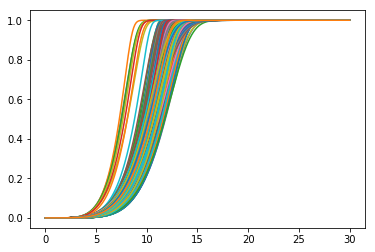

In [6]:
plt.figure()
for n in range(len(m3)):
    plt.plot(t/60, mode1df_wtm1.loc[n]['MLKLa_obs'].iloc[:]/5544)
plt.show()

In [7]:
thresh = 2772
ttdwt = []
for j in range(len(m3)):
    i_range = range(len(mode1df_wtm1.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_wtm1.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdwt.append(mode1df_wtm1.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdwt.append(np.inf)
for i in range(len(ttdwt)):
    if ttdwt[i] == np.inf:
        ttdwt[i] = 2100               

In [148]:
mode1wtm1.save('mode3_senspars_wtpmlkl.h5', include_obs_exprs=True)
np.array(ttdwt).dump(open('mode3_senspars_wtpmlkl_ttds.npy', 'wb'))

In [8]:
solverwtm1p2kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1wtm1p2kd  = solverwtm1p2kd.run(param_values=m1p2kd, num_processors = 20)
mode1df_p2kd = mode1wtm1p2kd.dataframe

2022-01-16 23:03:42.173 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 23:03:42.178 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 23:03:42.213 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 23:03:42.343 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 23:05:21.379 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 23:05:21.380 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 23:05:22.769 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [9]:
thresh = 2772
ttdp2kd = []
for j in range(len(m3)):
    i_range = range(len(mode1df_p2kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_p2kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdp2kd.append(mode1df_p2kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdp2kd.append(np.inf)
for i in range(len(ttdp2kd)):
    if ttdp2kd[i] == np.inf:
        ttdp2kd[i] = 2100  

In [149]:
mode1wtm1p2kd.save('mode3_senspars_p2kd.h5', include_obs_exprs=True)
np.array(ttdp2kd).dump(open('mode3_senspars_p2kd_ttds.npy', 'wb'))

In [10]:
solverwtm1p2oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1wtm1p2oe  = solverwtm1p2oe.run(param_values=m1p2oe, num_processors = 20)
mode1df_p2oe = mode1wtm1p2oe.dataframe

2022-01-16 23:07:37.852 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 23:07:37.863 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 23:07:37.932 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 23:07:38.095 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 23:09:17.447 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 23:09:17.449 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 23:09:19.057 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [11]:
thresh = 2772
ttdp2oe = []
for j in range(len(m3)):
    i_range = range(len(mode1df_p2oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_p2oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdp2oe.append(mode1df_p2oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdp2oe.append(np.inf)
for i in range(len(ttdp2oe)):
    if ttdp2oe[i] == np.inf:
        ttdp2oe[i] = 2100  

In [150]:
mode1wtm1p2oe.save('mode3_senspars_p2oe.h5', include_obs_exprs=True)
np.array(ttdp2oe).dump(open('mode3_senspars_p2oe_ttds.npy', 'wb'))

In [12]:
solverwtm1p3kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1wtm1p3kd  = solverwtm1p3kd.run(param_values=m1p3kd, num_processors = 20)
mode1df_p3kd = mode1wtm1p3kd.dataframe

2022-01-16 23:11:39.656 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 23:11:39.662 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 23:11:39.697 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 23:11:39.828 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 23:13:19.763 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 23:13:19.764 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 23:13:21.507 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [13]:
thresh = 2772
ttdp3kd = []
for j in range(len(m3)):
    i_range = range(len(mode1df_p3kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_p3kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdp3kd.append(mode1df_p3kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdp3kd.append(np.inf)
for i in range(len(ttdp3kd)):
    if ttdp3kd[i] == np.inf:
        ttdp3kd[i] = 2100  

In [151]:
mode1wtm1p3kd.save('mode3_senspars_p3kd.h5', include_obs_exprs=True)
np.array(ttdp3kd).dump(open('mode3_senspars_p3kd_ttds.npy', 'wb'))

In [14]:
solverp3oe= ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1p3oe  = solverp3oe.run(param_values=m1p3oe, num_processors = 20)
mode1df_p3oe  = mode1p3oe.dataframe

2022-01-16 23:15:34.163 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 23:15:34.182 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 23:15:34.250 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 23:15:34.413 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 23:17:17.299 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 23:17:17.302 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 23:17:18.664 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [15]:
thresh = 2772
ttdp3oe = []
for j in range(len(m3)):
    i_range = range(len(mode1df_p3oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_p3oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdp3oe.append(mode1df_p3oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdp3oe.append(np.inf)
for i in range(len(ttdp3oe)):
    if ttdp3oe[i] == np.inf:
        ttdp3oe[i] = 2100  

In [154]:
mode1p3oe.save('mode3_senspars_p3oe.h5', include_obs_exprs=True)
np.array(ttdp3oe).dump(open('mode3_senspars_p3oe_ttds.npy', 'wb'))

In [16]:
solverp4kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1p4kd  = solverp4kd.run(param_values=m1p4kd, num_processors = 20)
mode1df_p4kd = mode1p4kd.dataframe

2022-01-16 23:19:38.896 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 23:19:38.901 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 23:19:38.936 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 23:19:39.068 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 23:21:19.099 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 23:21:19.100 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 23:21:20.489 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [17]:
thresh = 2772
ttdp4kd = []
for j in range(len(m3)):
    i_range = range(len(mode1df_p4kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_p4kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdp4kd.append(mode1df_p4kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdp4kd.append(np.inf)
for i in range(len(ttdp4kd)):
    if ttdp4kd[i] == np.inf:
        ttdp4kd[i] = 2100              

In [155]:
mode1p4kd.save('mode3_senspars_p4kd.h5', include_obs_exprs=True)
np.array(ttdp4kd).dump(open('mode3_senspars_p4kd_ttds.npy', 'wb'))

In [18]:
solverp4oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1p4oe   = solverp4oe.run(param_values=m1p4oe, num_processors = 20)
mode1df_p4oe  = mode1p4oe.dataframe

2022-01-16 23:23:57.854 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 23:23:57.867 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 23:23:57.938 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 23:23:58.101 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 23:25:40.351 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 23:25:40.352 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 23:25:41.742 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [19]:
thresh = 2772
ttdp4oe = []
for j in range(len(m3)):
    i_range = range(len(mode1df_p4oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_p4oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdp4oe.append(mode1df_p4oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdp4oe.append(np.inf)
for i in range(len(ttdp4oe)):
    if ttdp4oe[i] == np.inf:
        ttdp4oe[i] = 2100               

In [156]:
mode1p4oe.save('mode3_senspars_p4oe.h5', include_obs_exprs=True)
np.array(ttdp4oe).dump(open('mode3_senspars_p4oe_ttds.npy', 'wb'))

In [20]:
solverm1p5kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p5kd  = solverm1p5kd.run(param_values=m1p5kd, num_processors = 20)
mode1df_m1p5kd = mode1m1p5kd.dataframe

2022-01-16 23:27:44.781 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 23:27:44.786 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 23:27:44.820 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 23:27:44.951 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 23:29:26.843 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 23:29:26.844 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 23:29:28.696 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [21]:
thresh = 2772
ttdm1p5kd = []
for j in range(len(m3)):
    i_range = range(len(mode1df_m1p5kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p5kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p5kd.append(mode1df_m1p5kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p5kd.append(np.inf)
for i in range(len(ttdm1p5kd)):
    if ttdm1p5kd[i] == np.inf:
        ttdm1p5kd[i] = 2100               

In [158]:
mode1m1p5kd.save('mode3_senspars_p5kd.h5', include_obs_exprs=True)
np.array(ttdm1p5kd).dump(open('mode3_senspars_p5kd_ttds.npy', 'wb'))

In [22]:
solverm1p5oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p5oe   = solverm1p5oe.run(param_values=m1p5oe, num_processors = 20)
mode1df_m1p5oe  = mode1m1p5oe.dataframe

2022-01-16 23:31:40.496 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-16 23:31:40.501 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-16 23:31:40.536 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-16 23:31:40.670 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-16 23:33:22.620 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-16 23:33:22.705 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-16 23:33:24.201 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [24]:
thresh = 2772
ttdm1p5oe = []
for j in range(len(m3)):
    i_range = range(len(mode1df_m1p5oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p5oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p5oe.append(mode1df_m1p5oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p5oe.append(np.inf)
for i in range(len(ttdm1p5oe)):
    if ttdm1p5oe[i] == np.inf:
        ttdm1p5oe[i] = 2100               

In [159]:
mode1m1p5oe.save('mode3_senspars_p5oe.h5', include_obs_exprs=True)
np.array(ttdm1p5oe).dump(open('mode3_senspars_p5oe_ttds.npy', 'wb'))

In [25]:
solverm1p6kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p6kd  = solverm1p6kd.run(param_values=m1p6kd, num_processors = 20)
mode1df_m1p6kd = mode1m1p6kd.dataframe

2022-01-17 10:30:10.462 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 10:30:10.467 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 10:30:10.502 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 10:30:10.637 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 10:31:54.722 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 10:31:54.724 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 10:31:56.175 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [26]:
thresh = 2772
ttdm1p6kd = []
for j in range(len(m3)):
    i_range = range(len(mode1df_m1p6kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p6kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p6kd.append(mode1df_m1p6kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p6kd.append(np.inf)
for i in range(len(ttdm1p6kd)):
    if ttdm1p6kd[i] == np.inf:
        ttdm1p6kd[i] = 2100               

In [160]:
mode1m1p6kd.save('mode3_senspars_p6kd.h5', include_obs_exprs=True)
np.array(ttdm1p6kd).dump(open('mode3_senspars_p6kd_ttds.npy', 'wb'))

In [27]:
solverm1p6oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p6oe  = solverm1p6oe.run(param_values=m1p6oe, num_processors = 20)
mode1df_m1p6oe = mode1m1p6oe.dataframe

2022-01-17 10:34:13.821 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 10:34:13.832 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 10:34:13.901 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 10:34:14.061 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 10:35:56.873 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 10:35:56.874 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 10:35:58.295 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [28]:
thresh = 2772
ttdm1p6oe = []
for j in range(len(m3)):
    i_range = range(len(mode1df_m1p6oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p6oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p6oe.append(mode1df_m1p6oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p6oe.append(np.inf)
for i in range(len(ttdm1p6oe)):
    if ttdm1p6oe[i] == np.inf:
        ttdm1p6oe[i] = 2100               

In [161]:
mode1m1p6oe.save('mode3_senspars_p6oe.h5', include_obs_exprs=True)
np.array(ttdm1p6oe).dump(open('mode3_senspars_p6oe_ttds.npy', 'wb'))

In [29]:
solverm1p12kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p12kd  = solverm1p12kd.run(param_values=m1p12kd, num_processors = 20)
mode1df_m1p12kd = mode1m1p12kd.dataframe

2022-01-17 10:38:11.234 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 10:38:11.240 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 10:38:11.280 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 10:38:11.414 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 10:39:53.445 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 10:39:53.447 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 10:39:54.853 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [30]:
thresh = 2772
ttdm1p12kd = []
for j in range(len(m3)):
    i_range = range(len(mode1df_m1p12kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p12kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p12kd.append(mode1df_m1p12kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p12kd.append(np.inf)
for i in range(len(ttdm1p12kd)):
    if ttdm1p12kd[i] == np.inf:
        ttdm1p12kd[i] = 2100               

In [162]:
mode1m1p12kd.save('mode3_senspars_p12kd.h5', include_obs_exprs=True)
np.array(ttdm1p12kd).dump(open('mode3_senspars_p12kd_ttds.npy', 'wb'))

In [31]:
solverm1p12oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p12oe  = solverm1p12oe.run(param_values=m1p12oe, num_processors = 20)
mode1df_m1p12oe = mode1m1p12oe.dataframe

2022-01-17 10:43:12.088 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 10:43:12.093 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 10:43:12.154 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 10:43:12.333 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 10:44:56.500 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 10:44:56.502 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 10:44:58.028 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [32]:
thresh = 2772
ttdm1p12oe = []
for j in range(len(m3)):
    i_range = range(len(mode1df_m1p12oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p12oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p12oe.append(mode1df_m1p12oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p12oe.append(np.inf)
for i in range(len(ttdm1p12oe)):
    if ttdm1p12oe[i] == np.inf:
        ttdm1p12oe[i] = 2100               

In [163]:
mode1m1p12oe.save('mode3_senspars_p12oe.h5', include_obs_exprs=True)
np.array(ttdm1p12oe).dump(open('mode3_senspars_p12oe_ttds.npy', 'wb'))

In [33]:
solverm1p13kd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p13kd  = solverm1p13kd.run(param_values=m1p13kd, num_processors = 20)
mode1df_m1p13kd = mode1m1p13kd.dataframe

2022-01-17 10:46:39.374 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 10:46:39.380 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 10:46:39.414 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 10:46:39.543 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 10:48:22.978 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 10:48:22.979 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 10:48:24.407 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [34]:
thresh = 2772
ttdm1p13kd = []
for j in range(len(m3)):
    i_range = range(len(mode1df_m1p13kd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p13kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p13kd.append(mode1df_m1p13kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p13kd.append(np.inf)
for i in range(len(ttdm1p13kd)):
    if ttdm1p13kd[i] == np.inf:
        ttdm1p13kd[i] = 2100    

In [164]:
mode1m1p13kd.save('mode3_senspars_p13kd.h5', include_obs_exprs=True)
np.array(ttdm1p13kd).dump(open('mode3_senspars_p13kd_ttds.npy', 'wb'))

In [35]:
solverm1p13oe = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1m1p13oe  = solverm1p13oe.run(param_values=m1p13oe, num_processors = 20)
mode1df_m1p13oe = mode1m1p13oe.dataframe

2022-01-17 10:50:41.700 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-17 10:50:41.705 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-17 10:50:41.740 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-17 10:50:41.872 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-17 10:52:27.410 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-17 10:52:27.411 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-17 10:52:28.811 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [36]:
thresh = 2772
ttdm1p13oe = []
for j in range(len(m3)):
    i_range = range(len(mode1df_m1p13oe.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_m1p13oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm1p13oe.append(mode1df_m1p13oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm1p13oe.append(np.inf)
for i in range(len(ttdm1p13oe)):
    if ttdm1p13oe[i] == np.inf:
        ttdm1p13oe[i] = 2100    

In [165]:
mode1m1p13oe.save('mode3_senspars_p13oe.h5', include_obs_exprs=True)
np.array(ttdm1p13oe).dump(open('mode3_senspars_p13oe_ttds.npy', 'wb'))

In [37]:
ttdwt2 = [ttdwt / 60 for ttdwt in ttdwt]
ttdm1p2kd2 = [ttdp2kd / 60 for ttdp2kd in ttdp2kd]
ttdm1p3kd2 = [ttdp3kd / 60 for ttdp3kd in ttdp3kd]
ttdm1p4kd2 = [ttdp4kd / 60 for ttdp4kd in ttdp4kd]
ttdm1p5kd2 = [ttdm1p5kd / 60 for ttdm1p5kd in ttdm1p5kd]
ttdm1p6kd2 = [ttdm1p6kd / 60 for ttdm1p6kd in ttdm1p6kd]
ttdm1p12kd2 = [ttdm1p12kd / 60 for ttdm1p12kd in ttdm1p12kd]
ttdm1p13kd2 = [ttdm1p13kd / 60 for ttdm1p13kd in ttdm1p13kd]

In [38]:
ttdm1p2oe2 = [ttdp2oe / 60 for ttdp2oe in ttdp2oe]
ttdm1p3oe2 = [ttdp3oe / 60 for ttdp3oe in ttdp3oe]
ttdm1p4oe2 = [ttdp4oe / 60 for ttdp4oe in ttdp4oe]
ttdm1p5oe2 = [ttdm1p5oe / 60 for ttdm1p5oe in ttdm1p5oe]
ttdm1p6oe2 = [ttdm1p6oe / 60 for ttdm1p6oe in ttdm1p6oe]
ttdm1p12oe2 = [ttdm1p12oe / 60 for ttdm1p12oe in ttdm1p12oe]
ttdm1p13oe2 = [ttdm1p13oe / 60 for ttdm1p13oe in ttdm1p13oe]

In [167]:
print(ttdwt2.count(35))
print(ttdm1p2kd2.count(35))
print(ttdm1p3kd2.count(35))
print(ttdm1p4kd2.count(35))
print(ttdm1p5kd2.count(35))
print(ttdm1p6kd2.count(35))
print(ttdm1p12kd2.count(35))
print(ttdm1p13kd2.count(35))
print('')
print(ttdm1p2oe2.count(35))
print(ttdm1p3oe2.count(35))
print(ttdm1p4oe2.count(35))
print(ttdm1p5oe2.count(35))
print(ttdm1p6oe2.count(35))
print(ttdm1p12oe2.count(35))
print(ttdm1p13oe2.count(35))

7
9
10
3
12
5
0
7

11
4
15
10
11
8
10


In [41]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode3 = pd.DataFrame({'WT': ttdwt2,'P2 KD': ttdm1p2kd2,'P2 OE': ttdm1p2oe2,'P3 KD': ttdm1p3kd2,'P3 OE': ttdm1p3oe2,
                      'P4 KD': ttdm1p4kd2,'P4 OE': ttdm1p4oe2,'P5 KD': ttdm1p5kd2, 'P5 OE': ttdm1p5oe2,
                      'P6 KD': ttdm1p6kd2,'P6 OE': ttdm1p6oe2,'P12 KD': ttdm1p12kd2, 'P12 OE': ttdm1p12oe2,
                     'P13 KD': ttdm1p13kd2, 'P13 OE': ttdm1p13oe2})
dfclus3hr = pd.DataFrame(data = mode3,
                        columns = ['WT','P2 KD','P2 OE','P3 KD','P3 OE','P4 KD','P4 OE', 'P5 KD', 'P5 OE',
                                   'P6 KD','P6 OE','P12 KD', 'P12 OE', 'P13 KD', 'P13 OE'])

In [147]:
dfclus3hr.to_csv("mode3_allparamsensdf_ttds.csv")

No handles with labels found to put in legend.


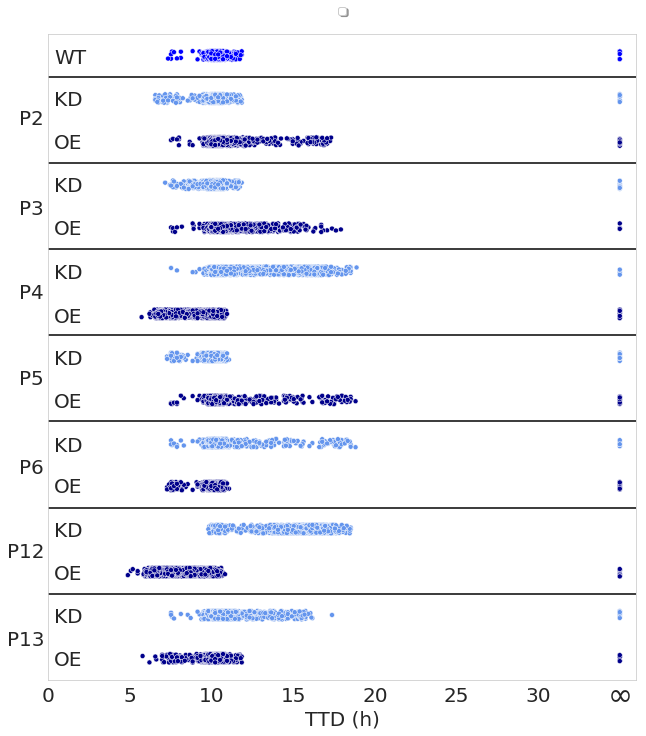

In [146]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,10))
my_pal = {"WT": "blue",
          'P2 KD': "cornflowerblue",'P2 OE':"darkblue",
          'P3 KD': "cornflowerblue",'P3 OE':"darkblue",
          'P4 KD': "cornflowerblue",'P4 OE':"darkblue",
          'P5 KD': "cornflowerblue",'P5 OE':"darkblue",
          'P6 KD': "cornflowerblue",'P6 OE':"darkblue",
          'P12 KD': "cornflowerblue",'P12 OE':"darkblue",
          'P13 KD': "cornflowerblue",'P13 OE':"darkblue"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus3hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor="white")
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# plt.annotate('A20', xy = (-0.09,.7), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('cIAP', xy = (-0.09,.42), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('CYLD', xy = (-0.1,.12), xycoords ='axes fraction', fontsize = 20)

# plt.annotate('WT', xy = (0.01,.912), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('KD', xy = (0.01,.77), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('OE', xy = (0.01,.625), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate('KD', xy = (0.01,.483), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('OE', xy = (0.01,.34), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate('KD', xy = (0.01,.197), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('OE', xy = (0.01,.055), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)


plt.annotate(r'$\infty$', xy = (0.95,-0.035), xycoords ='axes fraction', fontsize = 30)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.axhline(y=6.5, color = 'k')
plt.axhline(y=8.5, color = 'k')
plt.axhline(y=10.5, color = 'k')
plt.axhline(y=12.5, color = 'k')
# plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', '',
                                             '', '', '','', ''])
b.set_xlabel("")
plt.xticks(fontsize = 25)
b.set_ylabel("")
plt.annotate('WT', xy = (0.01,.955), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('KD', xy = (0.01,.89), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.822), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.756), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('OE', xy = (0.01,.689), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('KD', xy = (0.01,.622), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('OE', xy = (0.01,.554), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

plt.annotate('KD', xy = (0.01,.488), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.422), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.354), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('OE', xy = (0.01,.290), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)

plt.annotate('KD', xy = (0.01,.222), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('OE', xy = (0.01,.156), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)

plt.annotate('KD', xy = (0.01,.089), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.022), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

plt.annotate('P2', xy = (-0.05,.86), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('P3', xy = (-0.05,.72), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P4', xy = (-0.05,.59), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate('P5', xy = (-0.05,.57), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P5', xy = (-0.05,.458), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P6', xy = (-0.05,.32), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('P13', xy = (-0.07,.253), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P12', xy = (-0.07,.19), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P13', xy = (-0.07,.054), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
b.tick_params(labelsize=25)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
b.set_xlabel("TTD (h)",fontsize = 20)
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode3_paramsens_100tnf_stripdots_hrs_kdoeinside_edgewhite.pdf')

In [ ]:
# dfm232 = pd.melt(dfmode3)
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df2 = pd.DataFrame({'WT': ttdm2wt2,
                         'A20 KD': ttdm2a20kd2,
                          'A20 OE': ttdm2a20oe2,
                        'cIAP KD': ttdm2ciapkd2,a
                         'cIAP OE': ttdm2ciapoe2,
                        'CYLD KD': ttdm2cyldkd2,
                          'CYLD OE': ttdm2cyldoe2})
dfclus2hr = pd.DataFrame(data = mode1df2,
                        columns = ['WT','A20 KD','A20 OE','cIAP KD','cIAP OE','CYLD KD','CYLD OE'])

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"WT": "indianred", "cIAP KD": "lightsalmon", "cIAP OE": "mediumseagreen", 
          "A20 KD": "lightsalmon", "A20 OE": "mediumseagreen", 
          "CYLD KD": "lightsalmon", "CYLD OE": "mediumseagreen"}
# my_pal1 = {"wt0": "red", "a200":"blue"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=pd.melt(dfmode22), zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
# b = sns.swarmplot(x="value", y="variable", data=dfclus0, zorder=2, palette=my_pal1)
b.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
b.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0box_wswarm_5720_modnew.pdf')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))
for n in range(len(c2)):
    plt.plot(tspan, m3alldf100wt.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
             zorder = 1, color = 'blue', alpha= 0.4)
#     plt.plot(tspan, m1alldf100lubackd.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
#              zorder = 1, color = 'orange', alpha = 0.25)
#     plt.plot(tspan, m1alldf100lubacoe.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
#              zorder = 1, color = 'green', alpha = 0.25)
# colormap = plt.cm.Reds #nipy_spectral, Set1,Paired   
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
# for i,j in enumerate(ax.lines):
#     j.set_color(colors[i])
# ax1.legend(loc=2)    
plt.xlabel("Time (m)", fontsize=15)
plt.ylabel("[pMLKL] Normalized", fontsize=15)
plt.xlim(xmin = 0, xmax = 1800)
plt.ylim(ymin = 0)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
               Line2D([0], [0], color='green', lw=4)]
plt.legend(custom_lines, ['WT', 'LUBACKD', 'LUBACOE'], prop={'size': 10}, loc = 'best')
plt.tight_layout()
# plt.savefig('mode2_lubackdoe_testingplots_linesmin.pdf')
plt.show() 

In [ ]:
ttdm2a20kd

In [ ]:
print(len(ttdm2wt))
print(len(ttdm2lubkd))
print(len(ttdm2luboe2))
print(len(ttdm2a20kd))
print(len(ttdm2a20oe))
print(len(ttdm2cyldoe))
print(len(ttdm2cyldkd))

In [ ]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode2wt = pd.DataFrame({'WT': ttdm2wt,
                       'species':'wt'})
mode2ciap = pd.DataFrame({'KD': ttdm2ciapkd,
                         'OE': ttdm2ciapoe2,
                        'species': 'lubac'})
mode2a20 = pd.DataFrame({'KD': ttdm2a20kd,
                          'OE': ttdm2a20oe,
                        'species': 'a20'})
mode2cyld = pd.DataFrame({'KD': ttdm2cyldkd,
                          'OE': ttdm2cyldoe,
                        'species': 'cyld'})
framesm2 = [mode2wt,mode2lub, mode2a20, mode2cyld]
dfmode2 = pd.DataFrame(data = pd.concat(framesm2), columns = ['species','WT','KD','OE'])
dfm2 = pd.melt(dfmode2, id_vars=["species"])

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,7))
# sns.stripplot(data=mode2wt, orient = 'h',linewidth=0.5,size=10)
sns.stripplot(data=dfm2, orient = 'h',linewidth=0.5,size=10)
plt.xlim(xmin = 1)
plt.legend(loc = 'lower right')

In [ ]:
plt.figure(figsize = (12,7))
b = sns.boxplot(data=dfm2, palette="Set3", orient = 'h') #,showfliers = False, whis = 0)
b.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
b.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)

In [ ]:
# ax = sns.boxplot(x="day", y="total_bill", data=tips)
# ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")
plt.figure(figsize = (12,7))
ax = sns.boxplot(data=dfm2, y="species", x="value", hue="variable", palette="Set3") #,showfliers = False, whis = 0)
# ax = sns.swarmplot(x="value", y="variable", data=dfm22) #, palette=my_pal)
# plt.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)

In [ ]:
sns.barplot(data=dfm2, y="species", x="value", hue="variable", palette = "Blues")

In [ ]:
plt.figure(figsize = (12,7))
b = sns.stripplot(data=dfm2, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
b.tick_params(labelsize=20)
# plt.xlim(xmin = 250, xmax = 1000)

In [ ]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':0.5})
# print('clus', np.mean(CI_k63))
# print('clus', np.std(CI_k63))
fig, ax = plt.subplots()
# sns.boxplot(x = 'variable', y = 'value', label ='WT',color=["red",'green'], bins=10, **kwargs, kde = True)
# g = sns.boxplot(y='variable',x='value',data=dfclus2n, showfliers=True, boxprops=dict(alpha=1))
g = sns.stripplot(y='variable',x='value',data=dfm22, 
                        marker="o", alpha=0.3, order=['WT', 'LUBACKD','LUBACOE','A20KD', 'A20OE','CYLDKD', 'CYLDOE'])
# g = sns.stripplot(y='variable',x='value',data=dfclus2n, 
#                         marker="o", alpha=0.3, order=["WT", "LUBACKD", "LUBACOE"], color =['red', 'orange', 'blue'])
# g = sns.stripplot(y='variable',x='value',data=dfclus2n, 
#                         marker="o", alpha=0.3, order=["WT", "LUBACKD", "LUBACOE"], color =['red', 'orange', 'blue'])
# sns.distplot(mode2_lubacoe, label = 'LUBAC KD',color="blue", bins=10, **kwargs, kde = True)
# sns.distplot(mode2_lubackd, label = 'LUBAC OE',color="green", bins=10, **kwargs, kde = True)
# sns.distplot(CI_a20, label='uncluster',color="orange", bins=25, **kwargs)
# sns.distplot(CI_cyld, label='uncluster',color="deeppink", bins=25, **kwargs)
plt.xlabel('Time (m)')
plt.ylabel('Species')
plt.legend(loc = 'best')
# plt.xlim(xmin = 1, xmax = 1000)
# ax.set_yticks([1, 1.5, 2])
# plt.ylim(ymax = 0.04)
# plt.xticks([0, 5, 10, 15, 20, 24])
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
plt.tight_layout()
# plt.savefig('mode2_lubackdoe_testingplots_strip.pdf')
plt.show()

In [ ]:
list(model.initial_conditions)

In [ ]:
solverkdm2fadd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2fadd   = solverkdm2fadd.run(initials = {m.FADD(bDD=None, bDED1=None, bDED2=None):2695},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2fadd  = mode1kdm2fadd.dataframe

In [ ]:
thresh = 2772
ttdm2kdfadd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2fadd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2fadd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2kdfadd.append(mode1df_kdm2fadd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2kdfadd.append(np.inf)
for i in range(len(ttdm2kdfadd)):
    if ttdm2kdfadd[i] == np.inf:
        ttdm2kdfadd[i] = 2100               

In [ ]:
solveroem2fadd = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2fadd  = solveroem2fadd.run(initials = {m.FADD(bDD=None, bDED1=None, bDED2=None):89860},
                                        param_values=m2, num_processors = 20)
mode1df_oem2fadd = mode1oem2fadd.dataframe

In [ ]:
thresh = 2772
ttdm2oefadd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2fadd.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2fadd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2oefadd.append(mode1df_oem2fadd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2oefadd.append(np.inf)
for i in range(len(ttdm2oefadd)):
    if ttdm2oefadd[i] == np.inf:
        ttdm2oefadd[i] = 2100               

In [ ]:
solverkdm2r3 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2r3   = solverkdm2r3.run(initials = {m.RIP3(bRHIM=None, bDD=None, state='unmod'):3196},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2r3  = mode1kdm2r3.dataframe

In [ ]:
thresh = 2772
ttdm2kdr3 = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2r3.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2r3.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2kdr3.append(mode1df_kdm2r3.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2kdr3.append(np.inf)
for i in range(len(ttdm2kdr3)):
    if ttdm2kdr3[i] == np.inf:
        ttdm2kdr3[i] = 2100               

In [ ]:
solveroem2r3 = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2r3  = solveroem2r3.run(initials = {m.RIP3(bRHIM=None, bDD=None, state='unmod'):106540},
                                        param_values=m2, num_processors = 20)
mode1df_oem2r3 = mode1oem2r3.dataframe

In [ ]:
thresh = 2772
ttdm2oer3 = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2r3.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2r3.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2oer3.append(mode1df_oem2r3.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2oer3.append(np.inf)
for i in range(len(ttdm2oer3)):
    if ttdm2oer3[i] == np.inf:
        ttdm2oer3[i] = 2100               

In [ ]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode2wt = pd.DataFrame({'WT': ttdm2wt,
                       'species':'wt'})
mode2lub = pd.DataFrame({'KD': ttdm2lubkd,
                         'OE': ttdm2luboe2,
                        'species': 'lubac'})
mode2a20 = pd.DataFrame({'KD': ttdm2a20kd,
                          'OE': ttdm2a20oe,
                        'species': 'a20'})
mode2cyld = pd.DataFrame({'KD': ttdm2cyldkd,
                          'OE': ttdm2cyldoe,
                        'species': 'cyld'})
mode2fadd = pd.DataFrame({'KD': ttdm2kdfadd,
                          'OE': ttdm2oefadd,
                        'species': 'fadd'})
mode2r3 = pd.DataFrame({'KD': ttdm2kdr3,
                          'OE': ttdm2oer3,
                        'species': 'rip3'})
framesm3 = [mode2wt,mode2lub, mode2a20, mode2cyld]
# # framesm2 = [mode2wt,mode2dfn, mode2dfn2,mode2dfn3,mode2dfn4,mode2dfn5]
# # framesm3 = [mode2wt,mode2dfn, mode2dfn2]
# # framesm4 = [mode2wt,mode2dfn]
dfmode3 = pd.DataFrame(data = pd.concat(framesm3), columns = ['species','WT','KD','OE'])
dfm23 = pd.melt(dfmode3, id_vars=["species"])
# dfclus2 = pd.DataFrame(data = pd.concat(framesm2), columns = ['species','KD','WT','OE'])
# dfclus3 = pd.DataFrame(data = pd.concat(framesm3), columns = ['species','KD','WT','OE'])
# dfclus4 = pd.DataFrame(data = pd.concat(framesm4), columns = ['species','KD','WT','OE'])
# dfclus2nn = pd.melt(dfclus2nn)

In [ ]:
print(len(ttdm2wt))

In [ ]:
m4occurrenceswt = ttdm2wt.count(2100)
m4occurrenceslub = ttdm2lubkd.count(2100)
m4occurrencesfadd = ttdm2kdfadd.count(2100)
m4occurrencesr3 = ttdm2kdr3.count(2100)
print(m4occurrenceswt)
print(m4occurrenceslub)
print(m4occurrencesfadd)
print(m4occurrencesr3)

In [ ]:
# ax = sns.boxplot(x="day", y="total_bill", data=tips)
# ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")
plt.figure(figsize = (12,7))
ax = sns.boxplot(data=dfm23, y="species", x="value", hue="variable", palette="Set3") #,showfliers = False, whis = 0)
# ax = sns.swarmplot(x="value", y="variable", data=dfm22) #, palette=my_pal)
# plt.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)

In [ ]:
sns.barplot(data=dfm23, y="species", x="value", hue="variable", palette = "Blues")

In [ ]:
plt.figure(figsize = (12,7))
b = sns.stripplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
b.tick_params(labelsize=20)
# plt.xlim(xmin = 250, xmax = 1000)

In [ ]:
# dfm232 = pd.melt(dfmode3)
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df = pd.DataFrame({'WT': ttdm2wt, 
                        'LUBAC KD': ttdm2lubkd,
                         'LUBAC OE': ttdm2luboe2,
                        'A20 KD': ttdm2a20kd,
                          'A20 OE': ttdm2a20oe,
                        'CYLD KD': ttdm2cyldkd,
                          'CYLD OE': ttdm2cyldoe})
dfclus0n = pd.DataFrame(data = mode1df,
                        columns = ['WT', 'LUBAC KD', 'LUBAC OE','A20 KD', 'A20 OE','CYLD KD', 'CYLD OE'])
dfclus1n = pd.melt(dfclus0n)

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,7))
my_pal = {"WT": "darkorange", "LUBAC KD": "indigo", "LUBAC OE":"teal",
          "A20 KD":"indigo", "A20 OE":"teal","CYLD KD": "indigo", "CYLD OE":"teal"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus0n), marker = 'o',linewidth=0.5,size=5, palette=my_pal)
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
plt.annotate('LUBAC', xy = (-0.2,.7), xycoords ='axes fraction', fontsize = 20)
plt.annotate('A20', xy = (-0.2,.42), xycoords ='axes fraction', fontsize = 20)
plt.annotate('CYLD', xy = (-0.2,.12), xycoords ='axes fraction', fontsize = 20)
plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 30)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
b.set_xlabel("")
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode2_initsens_lubcylda20_100tnf_stripdots.pdf')

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,7))
my_pal = {"WT": "darkorange", "LUBAC KD": "indigo", "LUBAC OE":"teal",
          "A20 KD":"indigo", "A20 OE":"teal","CYLD KD": "indigo", "CYLD OE":"teal"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus0n), marker = 'o',palette=my_pal)
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
plt.annotate('LUBAC', xy = (-0.2,.7), xycoords ='axes fraction', fontsize = 20)
plt.annotate('A20', xy = (-0.2,.42), xycoords ='axes fraction', fontsize = 20)
plt.annotate('CYLD', xy = (-0.2,.12), xycoords ='axes fraction', fontsize = 20)
plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 30)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
b.set_xlabel("")
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.savefig('pmlkl_mode2_initsens_lubcylda20_100tnf_strip.pdf')

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,7))
my_pal = {"WT": "darkorange", "LUBAC KD": "indigo", "LUBAC OE":"teal",
          "A20 KD":"indigo", "A20 OE":"teal","CYLD KD": "indigo", "CYLD OE":"teal"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=pd.melt(dfclus0n), marker = 'o',zorder=2, palette=my_pal)
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
b.set_xlabel("")
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode2_initsens_lubcylda20_100tnf.pdf')

In [ ]:
solverkdm2cyld = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1kdm2cyld   = solverkdm2cyld.run(initials = {m.CYLD(brip=None, btraf=None):2772},
                                        param_values=m2, num_processors = 20)
mode1df_kdm2cyld  = mode1kdm2cyld.dataframe

In [ ]:
thresh = 2772
ttdm2cyldkd = []
for j in range(len(m2)):
    i_range = range(len(mode1df_kdm2cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_kdm2cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2cyldkd.append(mode1df_kdm2cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2cyldkd.append(np.inf)
for i in range(len(ttdm2cyldkd)):
    if ttdm2cyldkd[i] == np.inf:
        ttdm2cyldkd[i] = 2100               

In [ ]:
solveroem2cyld = ScipyOdeSimulator(model, tspan=t, verbose = True)
mode1oem2cyld  = solveroem2cyld.run(initials = {m.CYLD(brip=None, btraf=None):90750},
                                        param_values=m2, num_processors = 20)
mode1df_oem2cyld = mode1oem2cyld.dataframe

In [ ]:
thresh = 2772
ttdm2cyldoe = []
for j in range(len(m2)):
    i_range = range(len(mode1df_oem2cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
        if mode1df_oem2cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdm2cyldoe.append(mode1df_oem2cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdm2cyldoe.append(np.inf)
for i in range(len(ttdm2cyldoe)):
    if ttdm2cyldoe[i] == np.inf:
        ttdm2cyldoe[i] = 2100               